In [2]:
#dumb installs
%load_ext autoreload
%autoreload 2

import os
import astrophot as ap
import numpy as np
import torch
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

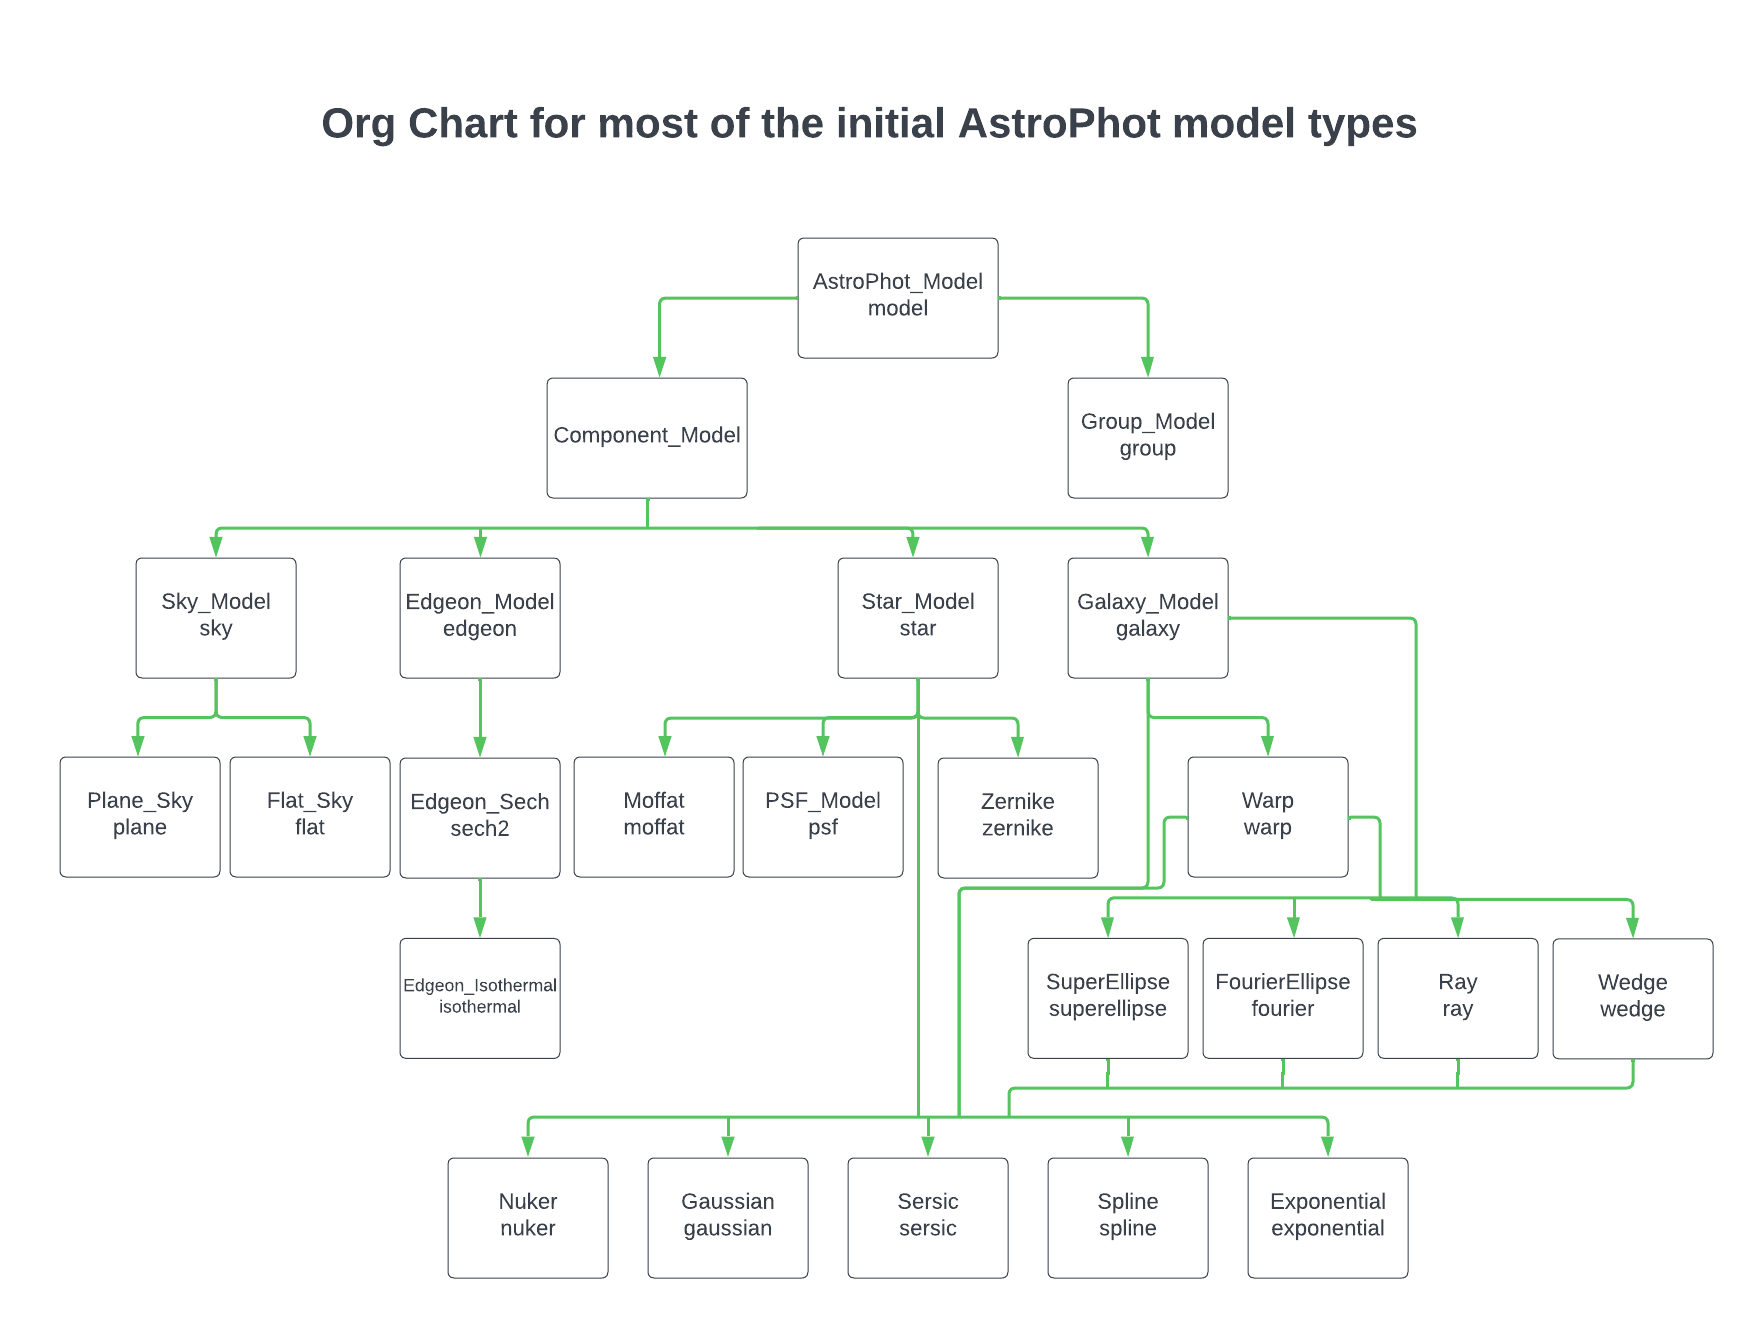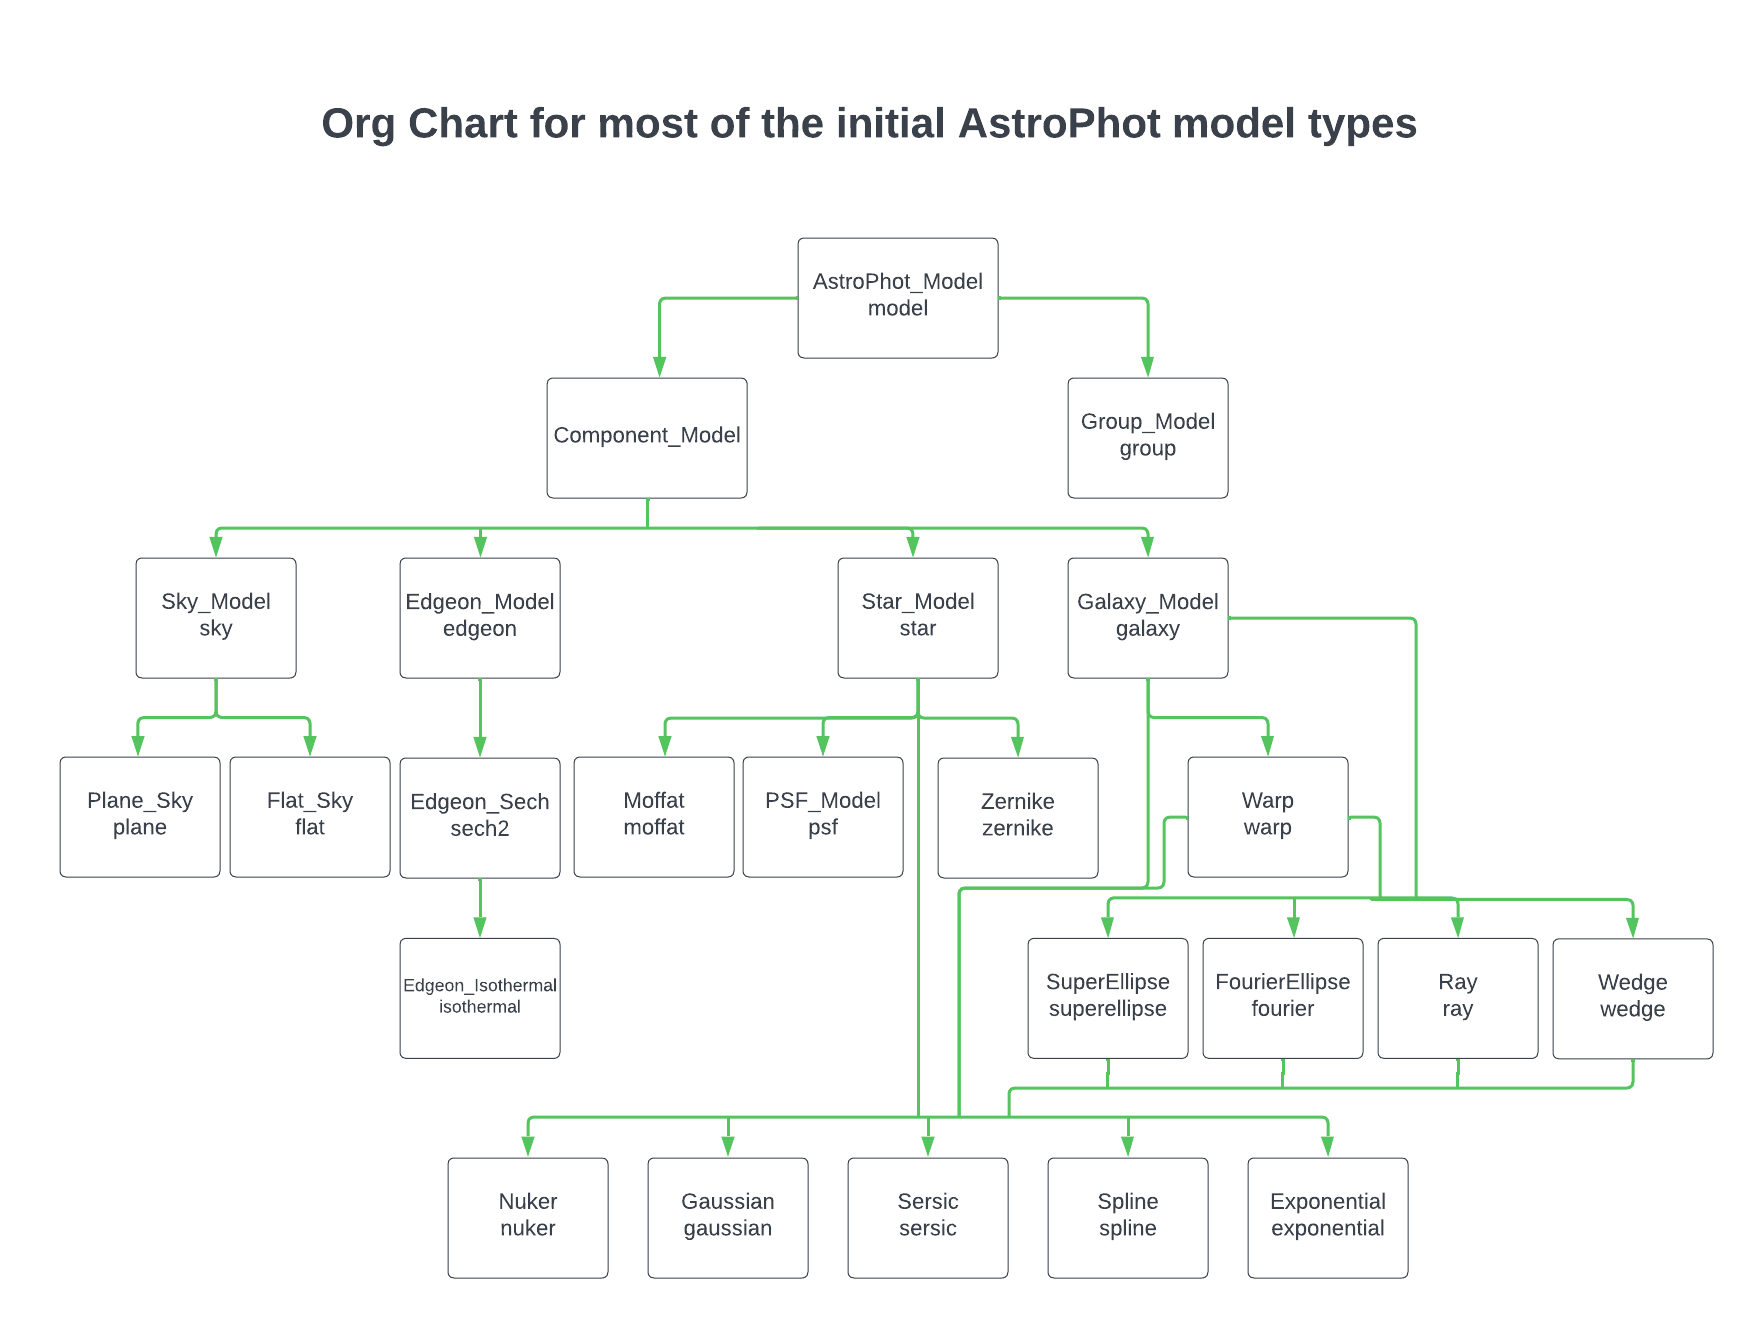

In [24]:
model1 = ap.models.AstroPhot_Model(
    name = "model1", # every model must have a unique name
    model_type = "sersic galaxy model", # this specifies the kind of model
    parameters = {"center": [50,45], "q": 0.6, "PA": 60 * np.pi / 180, "n": 2, "Re": 10, "Ie": 1}, # here we set initial values for each parameter
    target = ap.image.Target_Image(data = np.zeros((100,100)), zeropoint = 22.5, pixelscale = 1.), # every model needs a target, more on this later
)
model1.initialize() # before using the model it is good practice to call initialize so the model can get itself ready

# We can print the model's current state
model1.parameters

model1 (id-1208220606032, branch node):
  center (id-1208219633296): [50.0, 45.0] +- [0.1, 0.1] [arcsec]
  q (id-1208220648720): 0.6 +- 0.03 [b/a], limits: (0.0, 1.0)
  PA (id-1208220565904): 1.0471975511965976 +- 0.06 [radians], limits: (0.0, 3.141592653589793), cyclic
  n (id-1208220082128): 2.0 +- 0.05 [none], limits: (0.36, 8.0)
  Re (id-1208218910672): 10.0 [arcsec], limits: (0.0, None)
  Ie (id-1208220627344): 1.0 [log10(flux/arcsec^2)]

NameError: name 'model1' is not defined

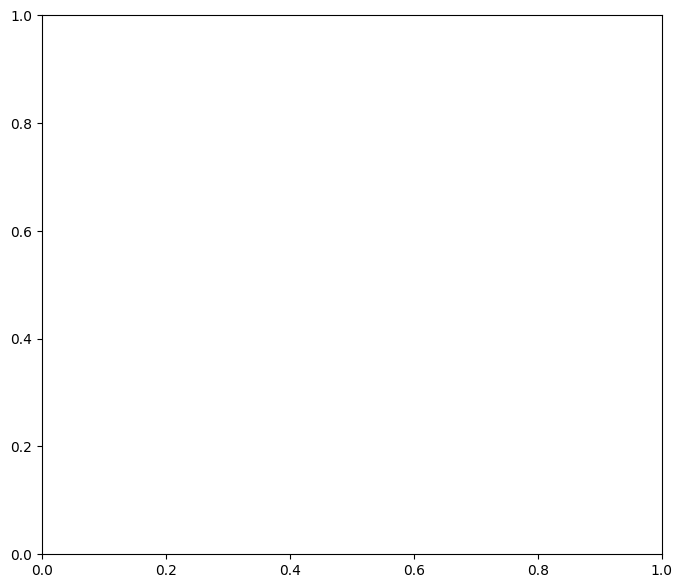

In [17]:
# AstroPhot has built in methods to plot relevant information. We didn't specify the region on the sky for
# this model to focus on, so we just made a 100x100 window. Unless you are very lucky this wont
# line up with what you're trying to fit, so next we'll see how to give the model a target.

fig, ax = plt.subplots(figsize = (8,7))
ap.plots.model_image(fig, ax, model1)

In [19]:
img_filename = "try_again.fits"
img_data = fits.getdata(img_filename, ext = 0)
fits.info(img_filename)


# plt.figure()
# plt.imshow(img_data)

Filename: try_again.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   (256, 256, 3)   float32   
